## Importing Necessary libraries

In [30]:
# Importing all the requisite libraries

import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.impute import SimpleImputer
from scipy.stats import iqr
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import warnings

warnings.simplefilter('ignore')

sns.set(color_codes=True)
%matplotlib inline 

## Loading the given dataset

In [31]:
# Converted the data file to .xlsx format
# Reading the dataset

veh_df = pd.read_excel(r'C:\Users\rdsri\OneDrive\Vehicle-1 1.xlsx')#,index_col=0)

In [32]:
# Using head() function to check whether the data is fetched or not
# Displaying the first 10 rows of the dataframe

veh_df.head(10).T

0    1    2    3    4    5    6    7    8    9
compactness                   95   91  104   93   85  107   97   90   86   93
circularity                   48   41   50   41   44  NaN   43   43   34   44
distance_circularity          83   84  106   82   70  106   73   66   62   98
radius_ratio                 178  141  209  159  205  172  173  157  140  NaN
pr.axis_aspect_ratio          72   57   66   63  103   50   65   65   61   62
max.length_aspect_ratio       10    9   10    9   52    6    6    9    7   11
scatter_ratio                162  149  207  144  149  255  153  137  122  183
elongatedness                 42   45   32   46   45   26   42   48   54   36
pr.axis_rectangularity        20   19   23   19   19   28   19   18   17   22
max.length_rectangularity    159  143  158  143  144  169  143  146  127  146
scaled_variance              176  170  223  160  241  280  176  162  141  202
scaled_variance.1            379  330  635  309  325  957  361  281  223  505
scaled_radius_of_gyration    184  158  220  127  188  264  172  164  112  152
scaled_radius_of_gyration.1   70   72   73   63  127   85   66   67   64   64
skewness_about                 6    9   14    6    9    5   13    3    2    4
skewness_about.1              16   14    9   10   11    9    1    3   14   14
skewness_about.2             187  189  188  199  180  181  200  193  200  195
hollows_ratio                197  199  196  207  183  183  204  202  208  204
class                        van  van  car  van  bus  bus  bus  van  van  car

## Performing basic EDA with data pre-processing

In [33]:
veh_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [34]:
columns = veh_df.columns

#Let's Label Encode our class variable: 

print(columns)
veh_df['class'] = LabelEncoder().fit_transform(veh_df['class'])

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


In [35]:
# veh_df['class'].value_counts()

There is some imbalance in terms of class as Class 1 i.e. Car has a significantly higher count as compared to other classes i.e. bus and van, while van has the lowest count. This will have some impact on model.

In [36]:
# Checking the dimension of the dataframe
veh_df.shape

(846, 19)

The insurance dataframe contains 846 instances with 19 attributes

In [37]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [38]:
# Checking for the data type of each attribute in the dataset
veh_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int32
dtype: object

In [39]:
# Checking for missing values in the dataset
veh_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

- class, hollow_ratio,max.length_rectangularity, , max.length_aspect_ratio, compactness has no missing values rest all features are having some kind of missing values.
- All attributes are of numerical type

In [40]:
newdf = veh_df.copy()

#separting all numercial independent attribute
nd = newdf.iloc[:,0:19]

# X.T

# fill missing values with mean column values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=1)
transformed_values = imputer.fit_transform(nd)
column = nd.columns
print(column)
nveh_df = pd.DataFrame(transformed_values, columns = column )

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


In [41]:
#Observing imbalance

nveh_df.groupby('class').count().T

class                        0.0  1.0  2.0
compactness                  218  429  199
circularity                  218  429  199
distance_circularity         218  429  199
radius_ratio                 218  429  199
pr.axis_aspect_ratio         218  429  199
max.length_aspect_ratio      218  429  199
scatter_ratio                218  429  199
elongatedness                218  429  199
pr.axis_rectangularity       218  429  199
max.length_rectangularity    218  429  199
scaled_variance              218  429  199
scaled_variance.1            218  429  199
scaled_radius_of_gyration    218  429  199
scaled_radius_of_gyration.1  218  429  199
skewness_about               218  429  199
skewness_about.1             218  429  199
skewness_about.2             218  429  199
hollows_ratio                218  429  199

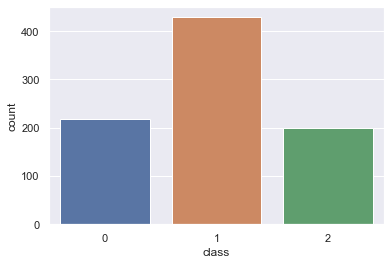

In [42]:
# veh_df.head(10).T

veh_df['class'].value_counts()

splitscaledf = veh_df.copy()
sns.countplot(veh_df['class'])
plt.show()

In [43]:
nveh_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [44]:
nveh_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095   33.400979  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.678910    7.882119   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.631079   31.355195  130.0  167.00   
scaled_variance.1            846.0  439.494076  176.457706  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.364286    4.903148    0.0    2.00   
skewness_about.1             846.0   12.602367    8.930792    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

- Compactness has mean and median values almost similar, it signifies that it is normally distributed and has no skewness/outlier
- circularity: it also seems to be normally distributed as mean and median has similar values
- scatter_ratio feature seems to be having some kind of skewness and outlier
- Scaled variance 1 & 2

## Understanding the attributes in the given dataset

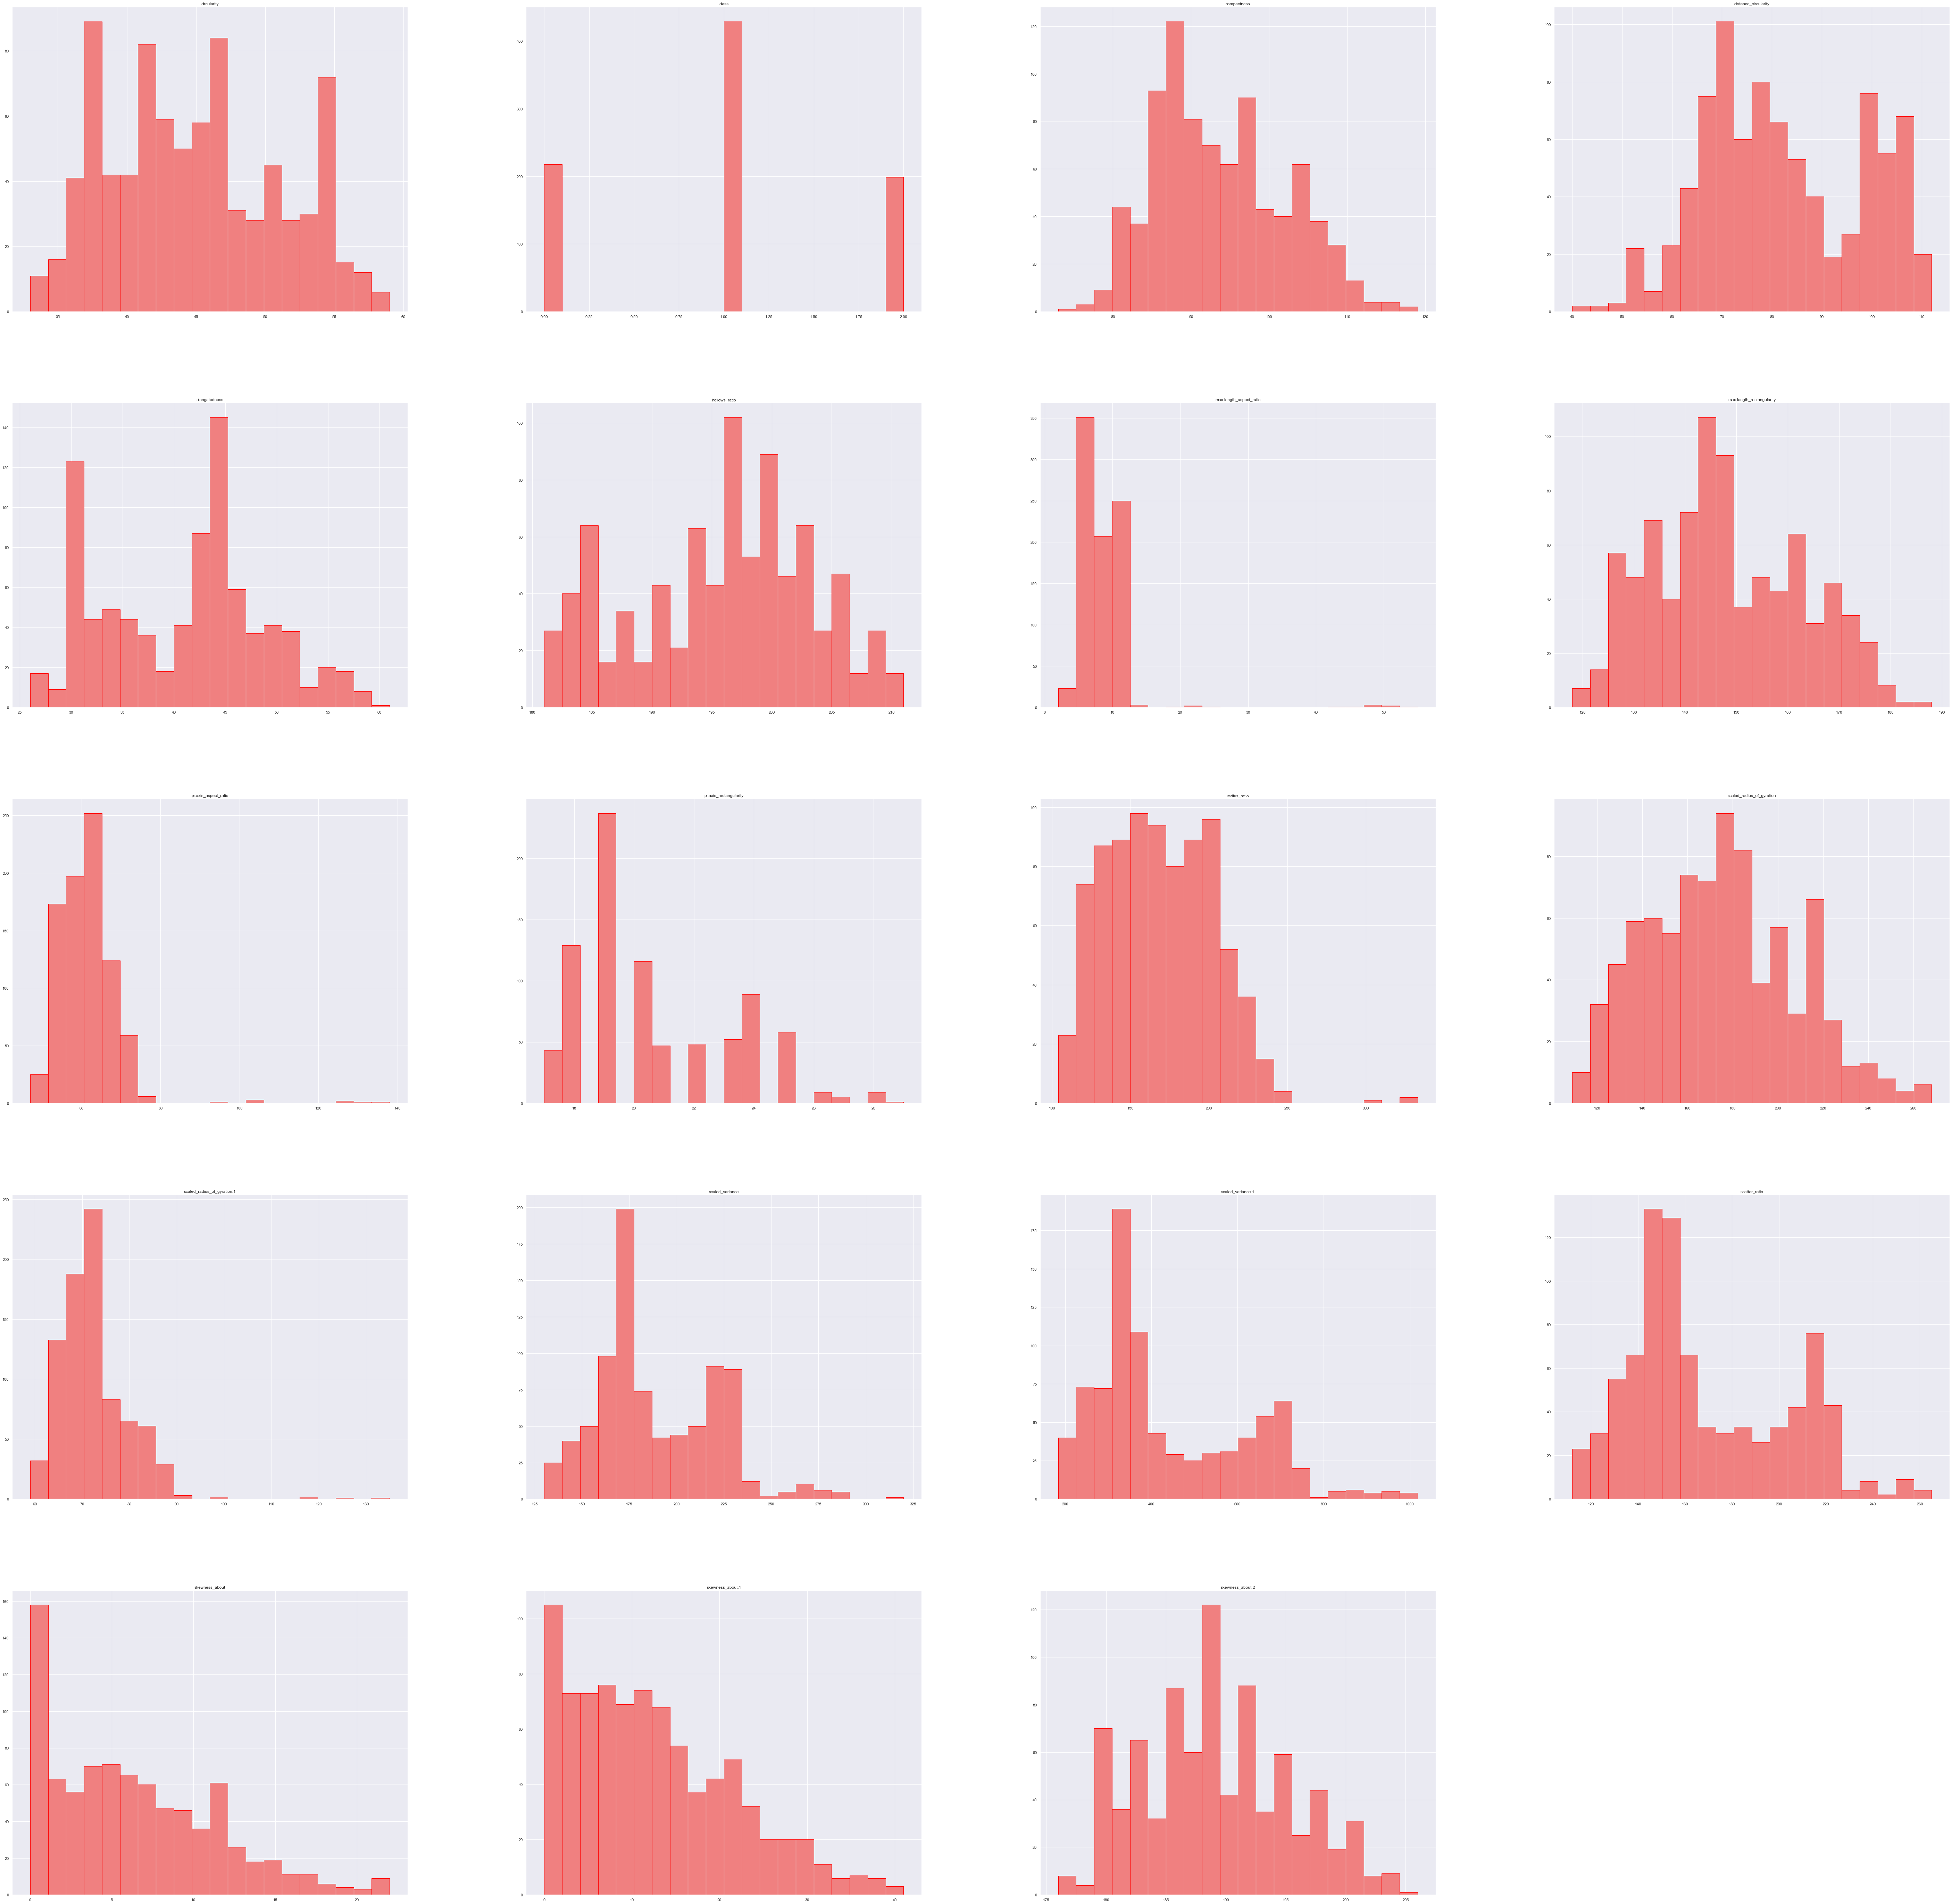

In [45]:
newdf.hist(bins=20, figsize=(100,100), color='Lightcoral', edgecolor = 'red')
 
plt.show()

In [46]:
skew_df = nveh_df.skew()
print("skewValue of dataframe attributes: ", skew_df)

skewValue of dataframe attributes:  compactness                    0.381271
circularity                    0.262584
distance_circularity           0.106837
radius_ratio                   0.396381
pr.axis_aspect_ratio           3.834882
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607629
elongatedness                  0.047875
pr.axis_rectangularity         0.772254
max.length_rectangularity      0.256359
scaled_variance                0.652753
scaled_variance.1              0.843027
scaled_radius_of_gyration      0.279647
scaled_radius_of_gyration.1    2.088422
skewness_about                 0.779277
skewness_about.1               0.688423
skewness_about.2               0.249468
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


- Most of the data attributes seems to be normally distributed.

- Scaled valriance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skwed.

- pr.axis_rectangularity seems to be haing outliers as there are some gaps found in the bar plot.

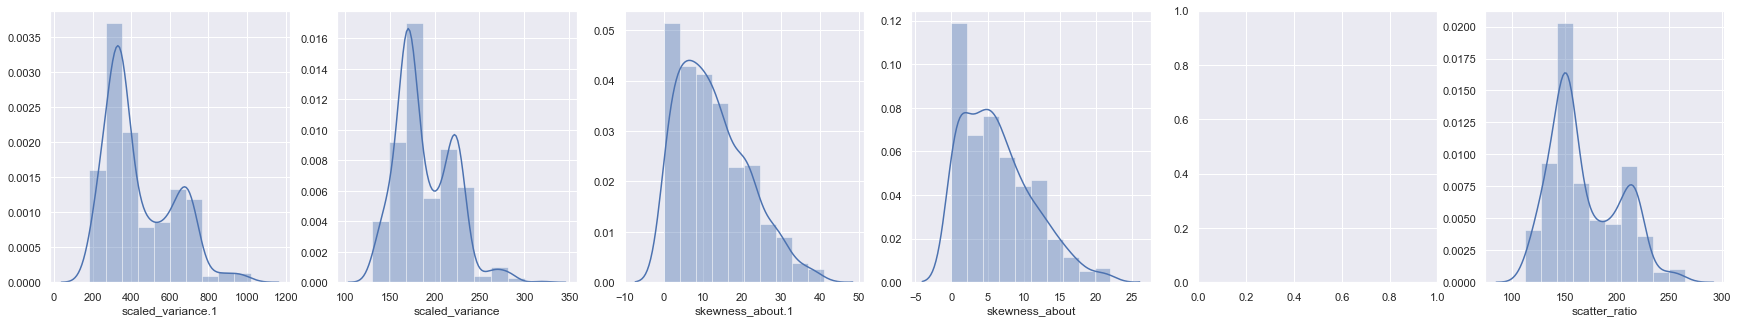

In [47]:
#Using seaborn distplot to analyze the distribution of our columns and see the skewness in attributes

f, ax = plt.subplots(1, 6, figsize=(30,5))

vis1 = sns.distplot(nveh_df["scaled_variance.1"],bins=10, ax= ax[0])
vis2 = sns.distplot(nveh_df["scaled_variance"],bins=10, ax=ax[1])
vis3 = sns.distplot(nveh_df["skewness_about.1"],bins=10, ax= ax[2])
vis4 = sns.distplot(nveh_df["skewness_about"],bins=10, ax=ax[3])
vis6 = sns.distplot(nveh_df["scatter_ratio"],bins=10, ax=ax[5])

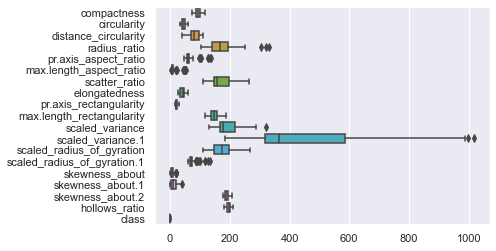

In [48]:
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers

ax = sns.boxplot(data=nveh_df, orient="h")

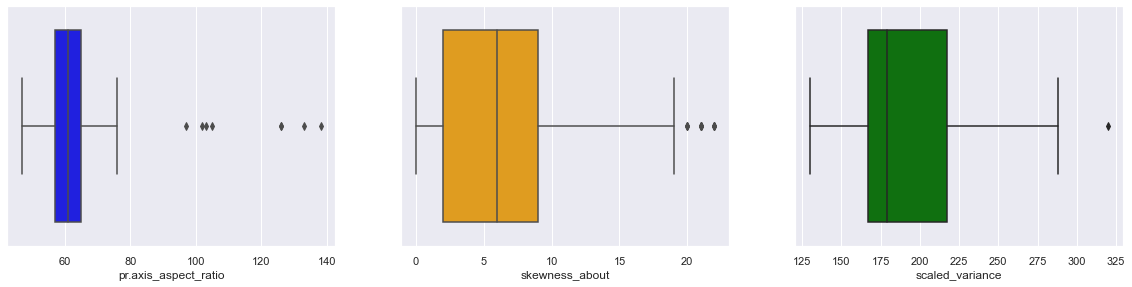

In [49]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= nveh_df['pr.axis_aspect_ratio'], color='Blue')

plt.subplot(3,3,2)
sns.boxplot(x= nveh_df.skewness_about, color='Orange')

plt.subplot(3,3,3)
sns.boxplot(x= nveh_df.scaled_variance, color='Green')

plt.show()

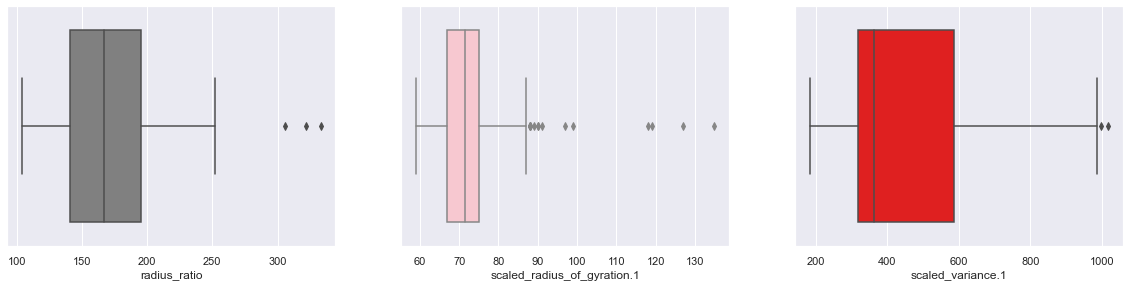

In [57]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['radius_ratio'], color='Grey')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'], color='Pink')

plt.subplot(3,3,3)
sns.boxplot(x= newdf['scaled_variance.1'], color='Red')

plt.show()

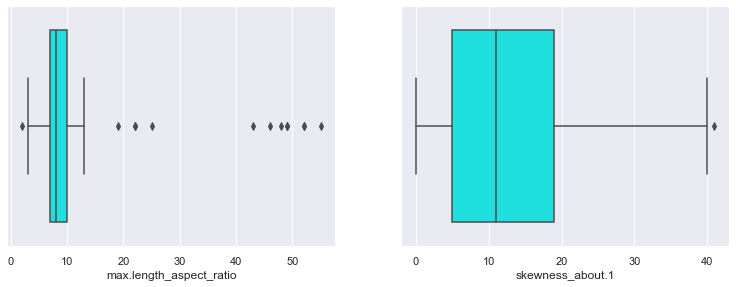

In [58]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['max.length_aspect_ratio'], color='Aqua')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['skewness_about.1'], color='Cyan')


plt.show()

Some of the attributes with outliers which is visible with all dotted points:-

- pr.axis_aspect_ratio
- skewness_about
- max_length_aspect_ratio
- skewness_about_1
- scaled_radius_of_gyration.1
- scaled_variance.1
- radius_ratio
- skewness_about
- scaled_variance.1

In [59]:
nveh_df.shape

(846, 19)

In [60]:
# Removing the outliers

Q1 = nveh_df.quantile(0.25)
Q3 = nveh_df.quantile(0.75)
IQR = Q3 - Q1

new_df = nveh_df[~((nveh_df < (Q1 - 1.5 * IQR)) |(nveh_df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df.shape

(813, 19)

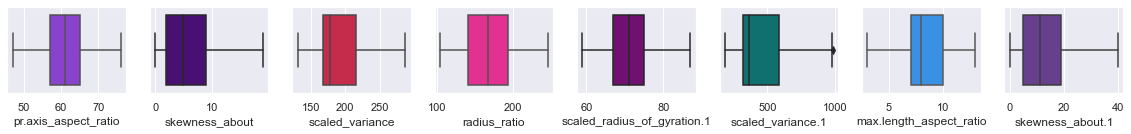

In [61]:
plt.figure(figsize= (20,15))
plt.subplot(8,8,1)
sns.boxplot(x= new_df['pr.axis_aspect_ratio'], color='blueviolet')

plt.subplot(8,8,2)
sns.boxplot(x= new_df.skewness_about, color='indigo')

plt.subplot(8,8,3)
sns.boxplot(x= new_df.scaled_variance, color='crimson')

plt.subplot(8,8,4)
sns.boxplot(x= new_df['radius_ratio'], color='deeppink')

plt.subplot(8,8,5)
sns.boxplot(x= new_df['scaled_radius_of_gyration.1'], color='purple')

plt.subplot(8,8,6)
sns.boxplot(x= new_df['scaled_variance.1'], color='teal')

plt.subplot(8,8,7)
sns.boxplot(x= new_df['max.length_aspect_ratio'], color='dodgerblue')

plt.subplot(8,8,8)
sns.boxplot(x= new_df['skewness_about.1'], color='rebeccapurple')

plt.show()

We can see that all out boxplot for all the attributes which had outlier have been treated and removed. Since no. of outliers were less we opted to remove it. Generally, we avoid this as it can lead to info loss in case of large data sets with large no of outliers

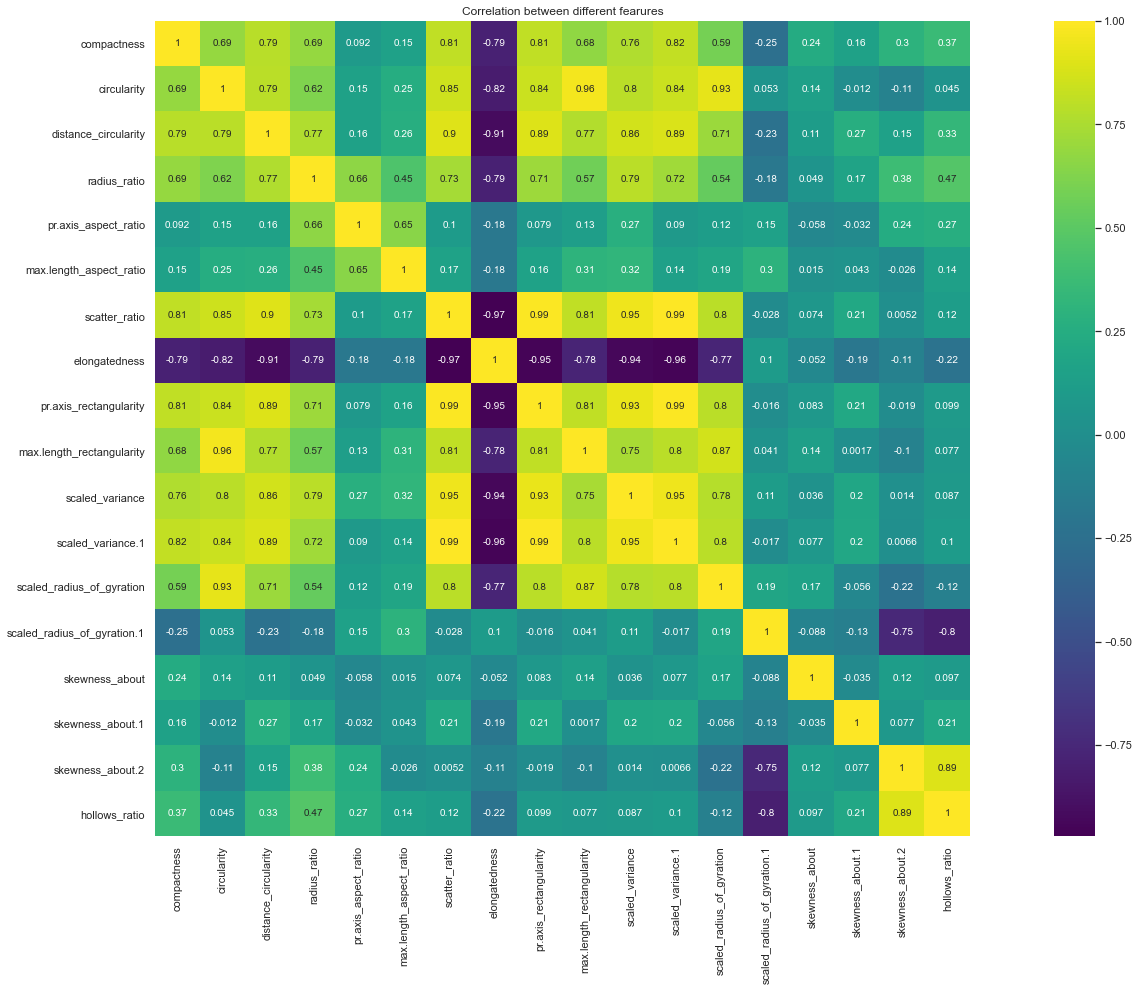

In [62]:
#Understanding Relationships within column using Pearson Correlation Coefficient

def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();

new_df= nveh_df.drop('class', axis=1)
# new_df
correlation_heatmap(new_df, 30,15)

#### Strong Relationship

  - Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98
  - skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
  - ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
  - scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
  - pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
  - scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97
  - elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95
  
#### Weak Relationship

  - max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.5
  - pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
  - scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
  - scaled_radius_gyration.1 & skewness_about seems to be very little correlated
  - skewness_about & skewness_about.1 not be correlated
  - skewness_about.1 and skewness_about.2 are not correlated.

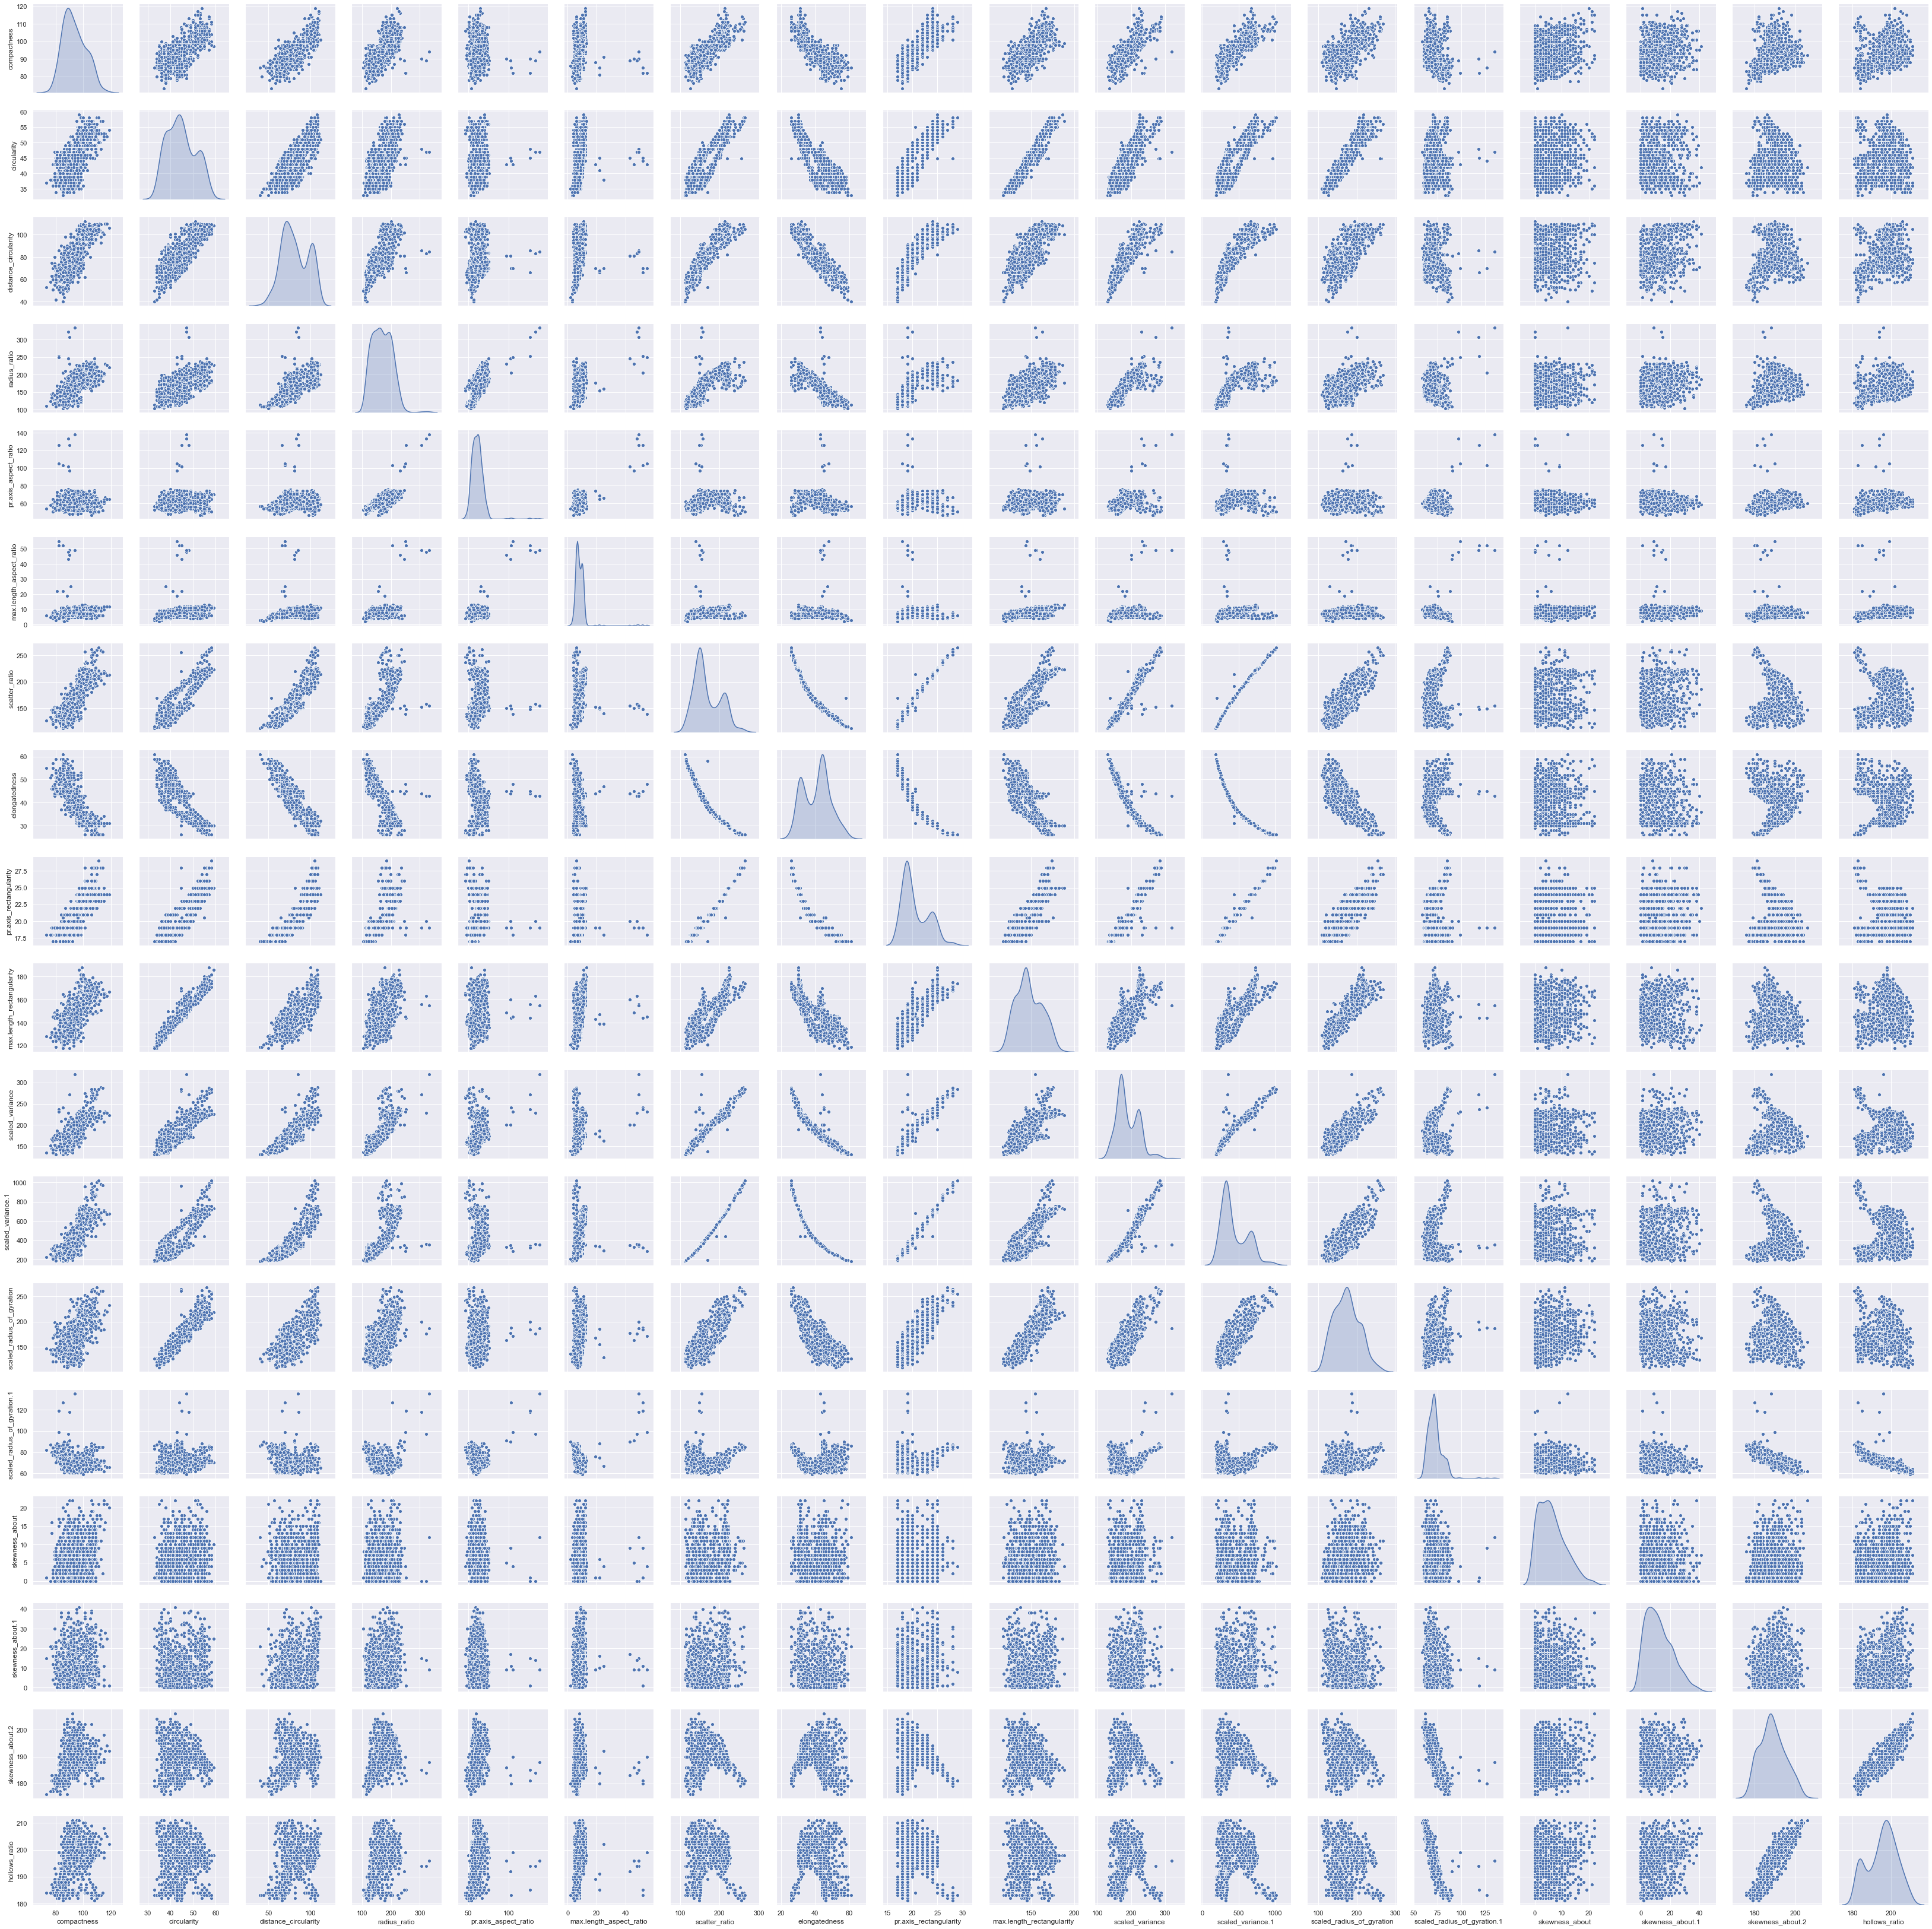

In [63]:
sns.pairplot(new_df, diag_kind="kde")

As observed in our correlation heatmap our pairplot seems to validate the same. Scaled Variance & Scaled Variance.1 seems to be having a very strong positive correlation with the value of 0.98. skewness_about_2 and hollow_ratio also seems to have a strong positive correlation with coeff: 0.89
scatter_ratio and elongatedness seem to have a very strong negative correlation. elongatedness and pr.axis_rectangularity seem to have a strong negative correlation.
We found from our pair plot analysis that, Scaled Variance & Scaled Variance.1 and elongatedness and pr.axis_rectangularity to be strongly correlated, so they need to be dropped of treated carefully before we go for model building.

### Choosing the right attributes which can be the right choice for model building

From above correlation matrix we can see that there are many features which are highly correlated. if we carefully analyse, we will find that many features are there which having more than 0.9 correlation. so we can decide to get rid of those columns whose correlation is +-0.9 or above.There are 8 such columns:

- max.length_rectangularity
- scaled_radius_of_gyration
- skewness_about.2
- scatter_ratio
- elongatedness
- pr.axis_rectangularity
- scaled_variance
- scaled_variance.1

## Splitting the data into training set & test set

In [64]:
X = nveh_df.drop('class', axis = 1)
y = nveh_df['class']

X

compactness  circularity  distance_circularity  radius_ratio  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
4           85.0         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841         93.0         39.0                  87.0         183.0   
842         89.0         46.0                  84.0         163.0   
843        106.0         54.0                 101.0         222.0   
844         86.0         36.0                  78.0         146.0   
845         85.0         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                     10.0          162.0   
1                    57.0                      9.0          149.0   
2                    66.0                     10.0          207.0   
3                    63.0                      9.0          144.0   
4                   103.0                     52.0          149.0   
..                    ...                      ...            ...   
841                  64.0                      8.0          169.0   
842                  66.0                     11.0          159.0   
843                  67.0                     12.0          222.0   
844                  58.0                      7.0          135.0   
845                  55.0                      5.0          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                      159.0   
1             45.0                    19.0                      143.0   
2             32.0                    23.0                      158.0   
3             46.0                    19.0                      143.0   
4             45.0                    19.0                      144.0   
..             ...                     ...                        ...   
841           40.0                    20.0                      134.0   
842           43.0                    20.0                      159.0   
843           30.0                    25.0                      173.0   
844           50.0                    18.0                      124.0   
845           56.0                    17.0                      128.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [65]:
#Scaling The Independent Data Set:

# sc = StandardScaler()
X_std =  StandardScaler().fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.7, test_size=0.3, random_state=42)

In [99]:
# X_train.T

#### Training Support Vector Classifier on the original 18 dimensions

In [100]:
svm = SVC(kernel='linear', C=1, random_state=42)

In [101]:
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [102]:
y_pred_svm = svm.predict(X_test)

In [103]:
print('Accuracy of Support Vector Machine on training set: {:.2f}%'.format(svm.score(X_train,y_train)*100))
print('Accuracy of Support Vector Machine on test set: {:.2f}%'.format(svm.score(X_test, y_test)*100))

Accuracy of Support Vector Machine on training set: 96.45%
Accuracy of Support Vector Machine on test set: 94.09%


### Performing K-Fold Cross Validation on the original 18 dimensions

In [197]:
kfold_model = KFold(n_splits=50, random_state=1)

results = cross_val_score(svm, X_std, y, cv=kfold_model)
print(results)

[0.88235294 0.82352941 1.         0.88235294 0.88235294 1.
 0.94117647 0.94117647 0.94117647 0.94117647 0.94117647 1.
 0.94117647 0.94117647 1.         1.         0.94117647 0.94117647
 1.         1.         0.88235294 1.         1.         1.
 0.94117647 0.88235294 0.88235294 0.88235294 0.94117647 1.
 0.94117647 0.94117647 0.94117647 1.         0.94117647 0.88235294
 0.94117647 1.         1.         1.         0.88235294 1.
 1.         0.88235294 1.         1.         0.875      0.9375
 1.         0.9375    ]


In [198]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.91% (4.88%)


### Principle Components 

We will perform PCA in following steps:

- Split our data into train and test data set

- Normalize the tarining set using standard scalar

- Calculate the covariance matrix.

- Calculate the eigenvectors and their eigenvalues.

- Sort the eigenvectors according to their eigenvalues in descending order.

- Choose the first K eigenvectors

- Build new dataset with reduced dimensionality.

In [156]:
X = nveh_df.drop('class', axis = 1)
y = nveh_df['class']

In [157]:
#Calculating covariance matrix

cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  

In [158]:
#Calculating Eigen Vectors & Eigen Values

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75259459e-01  1.27010856e-01  1.19874162e-01 -7.83109159e-02
  -6.93062475e-02  1.44650156e-01  4.53755811e-01  5.64713964e-01
   4.83554183e-01  2.61221731e-01 -4.64498989e-02  1.34446607e-02
  -1.59324486e-01  6.56773512e-03 -5.98448138e-02 -1.62328028e-03
  -6.05262978e-02 -3.85955867e-04]
 [ 2.93392341e-01 -1.26217125e-01  2.51835016e-02 -1.87525528e-01
   8.50186000e-02 -3.00733370e-01 -2.48092973e-01  1.79295222e-01
   1.45395937e-02 -9.75432534e-02 -2.55383379e-03 -1.97520615e-01
  -1.46192222e-02 -7.98780902e-04  3.96666736e-01  7.62595458e-02
  -3.40071641e-01 -5.85708475e-01]
 [ 3.04556452e-01  7.26862818e-02  5.60058748e-02  7.07959698e-02
  -4.07236757e-02 -1.38488042e-01  7.27989653e-02 -4.36047225e-01
   1.67573501e-01  2.08494817e-01 -7.05942549e-01 -6.37015997e-03
   2.33090309e-01 -3.71748194e-03 -1.51057100e-01 -3.10533715e-02
   6.61582176e-02 -1.58392894e-01]
 [ 2.67593206e-01  1.89635192e-01 -2.75066087e-01  4.22567515e-02
   4.60157077e-02  

In [159]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.408288224869981, array([ 0.27525946,  0.29339234,  0.30455645,  0.26759321,  0.0804939 ,
        0.09721986,  0.31687201, -0.31404236,  0.31395301,  0.28279042,
        0.30931053,  0.31414903,  0.27200252, -0.02091798,  0.04133167,
        0.05833316,  0.03015605,  0.07408137])), (3.016054767551138, array([ 0.12701086, -0.12621713,  0.07268628,  0.18963519,  0.12215874,
       -0.01072778, -0.04804731, -0.01279915, -0.06003514, -0.1161825 ,
       -0.06175369, -0.05327578, -0.20927966, -0.48854187,  0.0549212 ,
        0.12415286,  0.54094767,  0.54027981])), (1.9034788090465513, array([ 0.11987416,  0.0251835 ,  0.05600587, -0.27506609, -0.64204646,
       -0.59179991,  0.09765309, -0.05746458,  0.10950917,  0.0169994 ,
       -0.05646562,  0.10871143,  0.03136852, -0.28621109,  0.11569365,
        0.07548784, -0.00868929, -0.03951431])), (1.1802726839756428, array([-0.07831092, -0.18752553,  0.07079597,  0.04225675, -0.03285779,
       -0.03131997,  0.09598052, -0.08273807,  0.0

In [160]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)

cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

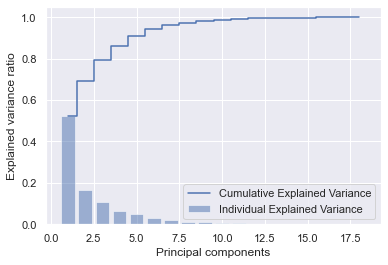

In [161]:
#Plotting The Explained Variance and Princiapl Components:

plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='Cumulative Explained Variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

- We can clearly see from the above plot that 8 dimensions are able to explain 95 %variance of data.

- We will use first 8 principal components going forward and calulate the reduced dimensions.

Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data.

In [199]:
#Dimensionality Reduction

P_reduce = np.array(eigvectors_sorted[0:9])   

X_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_8D)  # converting array to dataframe for pairplot

reduced_pca

0         1          2         3         4         5         6  \
0    0.332393  0.218638  -1.001286 -0.177328 -0.079106 -0.754814 -0.902187   
1   -1.593741  0.420549   0.369264 -0.233484 -0.693397 -0.519073  0.376234   
2    3.767535 -0.195041  -0.088237 -1.203129 -0.730907  0.705377 -0.032642   
3   -1.740753  2.829579  -0.109176 -0.377522  0.363483 -0.487863  0.468613   
4    0.555239 -4.757557 -11.703588 -0.145068 -3.257651 -0.211649  2.671191   
..        ...       ...        ...       ...       ...       ...       ...   
841 -0.444331  0.606954  -0.197136  1.444534 -1.065525  0.819842 -0.040515   
842 -0.316589 -0.164627  -0.794183  0.907933  0.235175 -1.437506 -0.603595   
843  4.807810  0.001824  -0.532773 -0.295988  1.344737 -0.219630  0.572948   
844 -3.295728  1.008803   0.357468  1.933241 -0.043075 -0.403457 -0.205109   
845 -4.766735 -0.334686   0.568739  1.224990  0.054287 -0.336468  0.057277   

            7         8  
0    0.383358  0.868964  
1   -0.247624 -0.146542  
2   -0.483439  0.308888  
3    0.022129  0.029270  
4    0.446380 -2.090488  
..        ...       ...  
841 -0.507866  0.304760  
842  0.155295  0.310103  
843 -0.110918  0.652654  
844 -0.319508  0.201552  
845  0.248356  0.431742  

[846 rows x 9 columns]

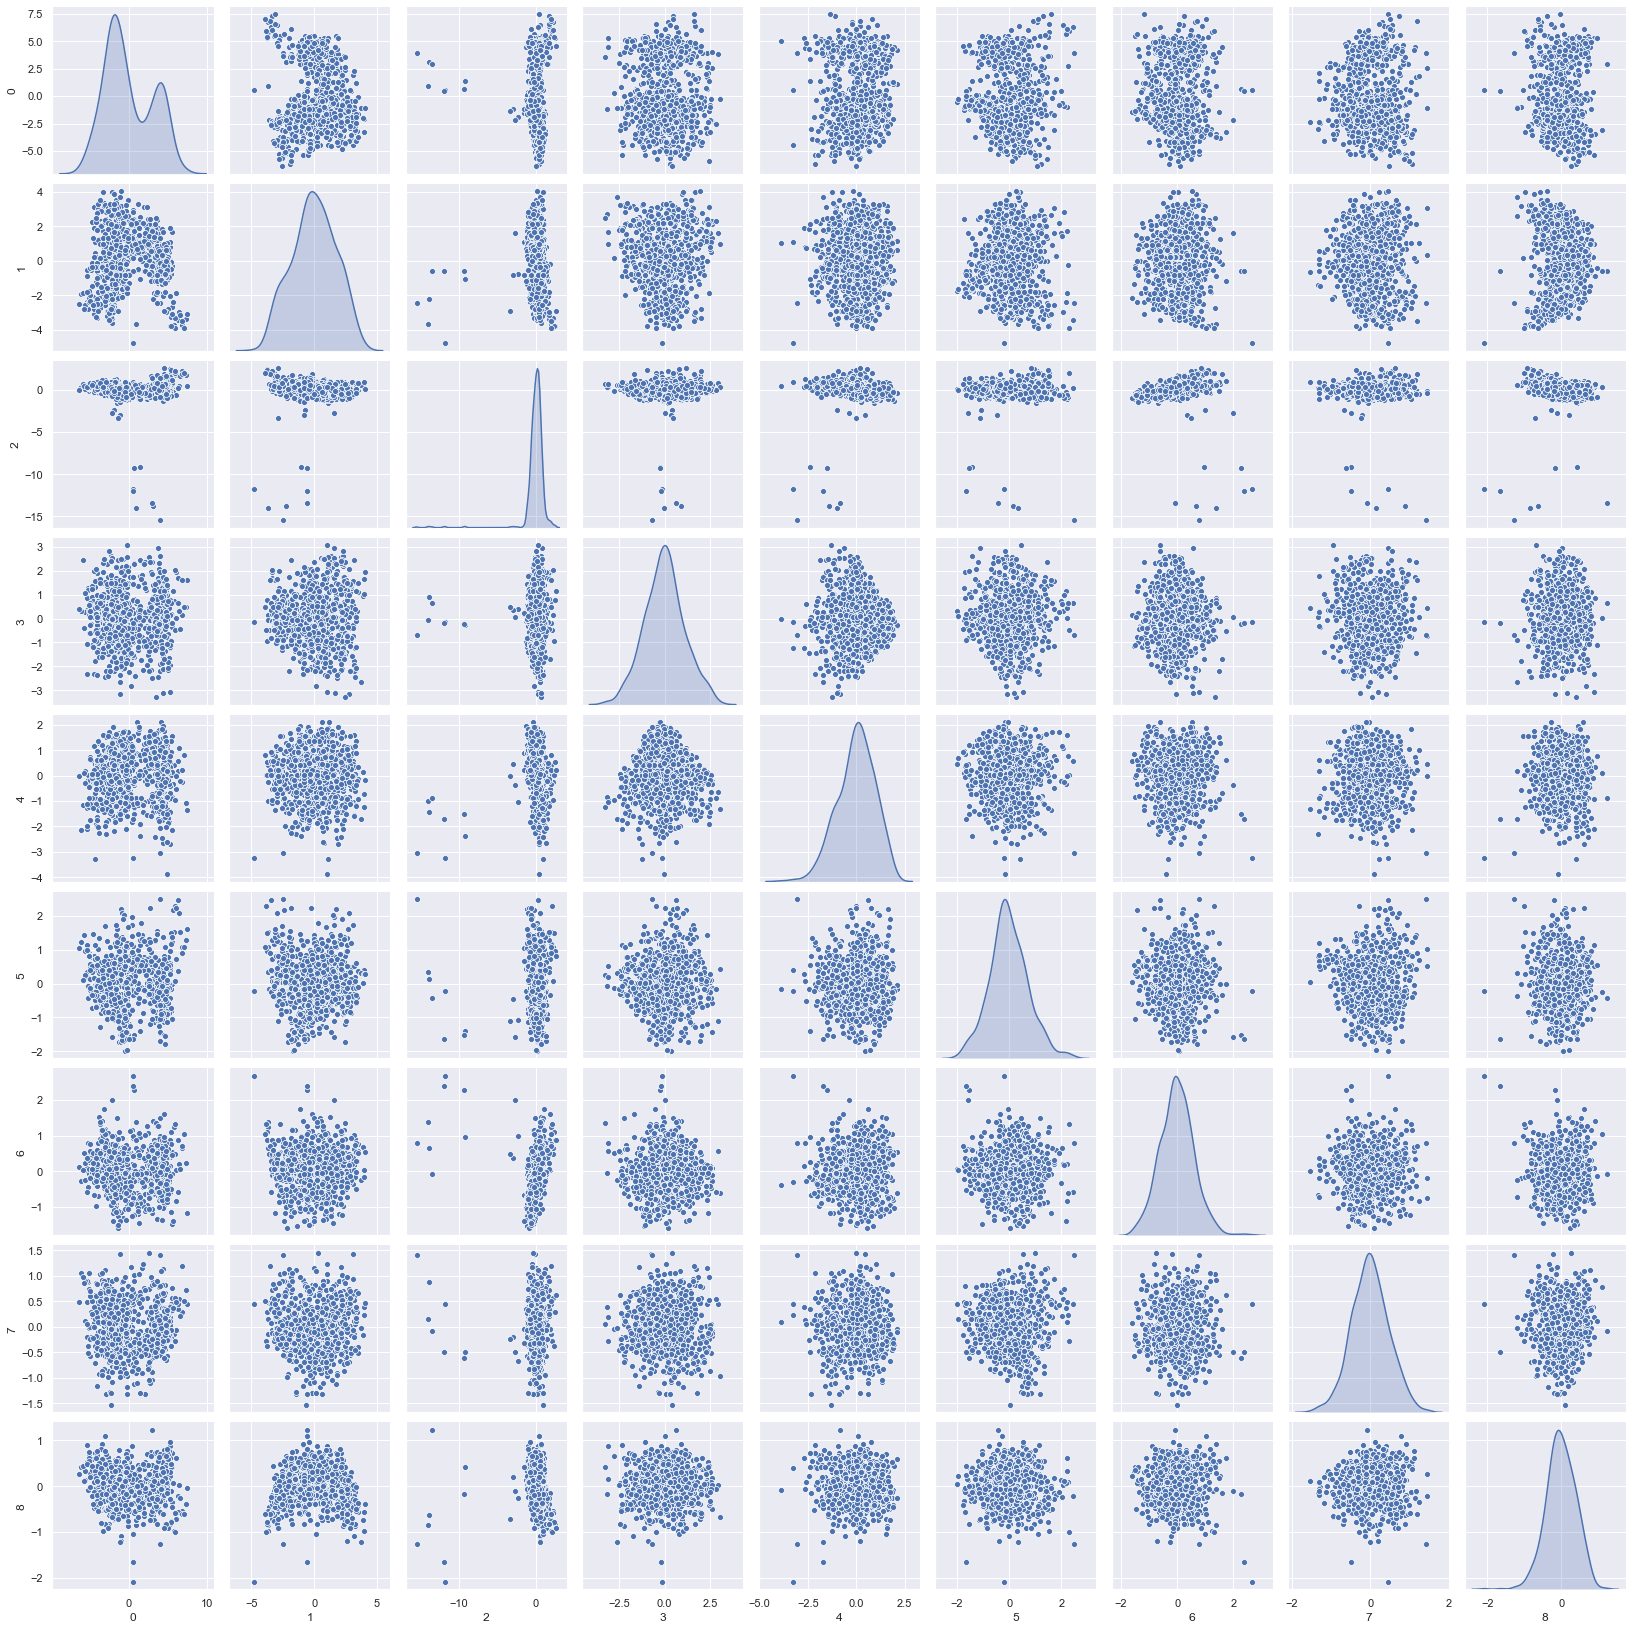

In [163]:
sns.pairplot(reduced_pca, diag_kind='kde') 

After dimensionality reduction using PCA, the attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no linear kind of relationship.

### Training SVM model on the reduced PCA Dimensions

In [164]:
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca, y, train_size=0.7, test_size=0.3, random_state=42)

In [165]:
#now fit the model on pca data with new dimension
# svm = SVC(kernel='linear', C=1, random_state=1)
svm1 = SVC(kernel='linear', C=1, random_state=42)
svm1.fit(pca_X_train,pca_y_train)

SVC(C=1, kernel='linear', random_state=42)

In [166]:
pca_y_predict = svm1.predict(pca_X_test)

In [201]:
print("Model Score On Reduced PCA Dimension: {:.2f}% ".format(svm1.score(pca_X_train, pca_y_train)*100))
print("Model Score On Reduced PCA Dimension: {:.2f}% ".format(svm1.score(pca_X_test, pca_y_test)*100))

Model Score On Reduced PCA Dimension: 91.39% 
Model Score On Reduced PCA Dimension: 91.34% 


### K-Fold Cross Validation score on Reduced PCA Dimensions

In [202]:
kfold_model1 = KFold(n_splits=50, random_state=1)

results1 = cross_val_score(svm1, reduced_pca, y, cv=kfold_model1)
print(results1)
print("Accuracy: %.2f%% (%.2f%%)" % (results1.mean()*100.0, results1.std()*100.0))

[0.94117647 0.82352941 0.94117647 0.82352941 0.94117647 0.94117647
 0.88235294 0.94117647 0.94117647 0.94117647 0.94117647 1.
 1.         0.82352941 0.94117647 0.88235294 0.88235294 0.88235294
 0.94117647 0.94117647 0.82352941 1.         0.82352941 0.88235294
 0.88235294 0.94117647 0.82352941 0.94117647 0.94117647 1.
 0.88235294 0.94117647 0.82352941 0.94117647 1.         0.76470588
 0.76470588 0.82352941 0.88235294 1.         0.88235294 0.94117647
 1.         0.88235294 0.82352941 0.88235294 0.875      0.875
 0.9375     0.8125    ]
Accuracy: 90.29% (6.35%)


###  My insights on the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components

In [185]:
print("Classification Report on Original Data:\n---------------------------------------\n",classification_report(y_test,y_pred_svm))
print("Classification Report on Reduced Dimensions:\n--------------------------------------------\n",classification_report(pca_y_test,pca_y_predict))

Classification Report on Original Data:
---------------------------------------
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        78
         1.0       0.96      0.93      0.95       118
         2.0       0.92      0.97      0.94        58

    accuracy                           0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254

Classification Report on Reduced Dimensions:
--------------------------------------------
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        78
         1.0       0.92      0.91      0.91       118
         2.0       0.95      0.95      0.95        58

    accuracy                           0.91       254
   macro avg       0.92      0.92      0.92       254
weighted avg       0.91      0.91      0.91       254



 #### Insights On Classification Reports: On original data:
 
Our model has a 96 % precision score when it comes to classifying cars from the given set of silhouette parameters.
It has 92 % precision when it comes to classifying the input as a van, while it has 92 % precision when it comes to predicting data as a bus.
In terms of recall score, our model has a recall score of 98 % for van classification, 97 % for car, and 89 % for the bus.
Our model has a weighted average of 95 % for all classification metrics.

 #### On Reduced Dimensions After PCA:
 
Our model has the highest precision score of 92 % when it comes to predicting van type, which is better as compared to prediction done on the original data set, which came out with a precision score of 88 % for the van.
The recall score is close with what our model scored on the original data set. It showed the highest recall score of 97 % in classifying data as a car.

In [190]:
cm_svm = confusion_matrix(y_test,y_pred_svm)

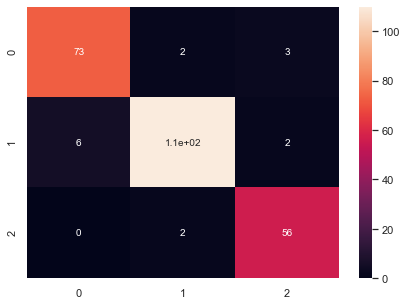

In [191]:
plt.figure(figsize = (7,5))
# cm_svm
sns.heatmap(cm_svm, annot=True)

plt.show() 

- Our model on the original data set has correctly classified 73 vans out of 78 actuals vans and has wrongly classified 2 vans to be car and 3 vans to be bus.
- In the case of 118 actual cars, our model has correctly classified 110 cars. it has wrongly classified 6 cars to be a van and also 2 car to be a bus.
- In the case of 58 instances of the actual bus, our model has correctly classified 56 buses, it has errored in classifying wrongly 2 buses to be a car.

In [194]:
cm_svm1 = confusion_matrix(pca_y_test,pca_y_predict)

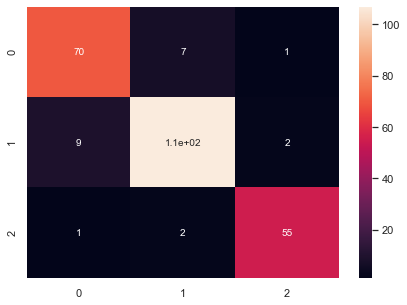

In [195]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_svm1, annot=True)

plt.show() 

In [196]:
# cm_svm1

- Out of 78 actual instances of van, our model has correctly predicted 70 vans and errored while classifying 7 vans as car and 1 van as bus.
- Out of 118 actuals cars, our model has correctly classified 107 of them to be a car and  errored in 11 cases where it wrongly classified 9 cars to a van and 2 cars to be a bus.
- Out of 58 actual bus, our model has correctly classified 55 of them to be a bus. It has errored in 3 cases where it wrongly classified 1 bus to be a van and 2 bus to be a car.

In [189]:
print("Model Score On Original Data: {:.2f}%".format(svm.score(X_test, y_test)*100))
print("Model Score On Reduced PCA Dimension: {:.2f}% ".format(svm1.score(pca_X_test, pca_y_test)*100))

Model Score On Original Data: 94.09%
Model Score On Reduced PCA Dimension: 91.34% 


In [172]:
print("Cross Validation Score on Original 18 Dimensions:\n",results)
print("\nAccuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Cross Validation Score on Original 18 Dimensions:
 [0.88235294 0.82352941 1.         0.88235294 0.88235294 1.
 0.94117647 0.94117647 0.94117647 0.94117647 0.94117647 1.
 0.94117647 0.94117647 1.         1.         0.94117647 0.94117647
 1.         1.         0.88235294 1.         1.         1.
 0.94117647 0.88235294 0.88235294 0.88235294 0.94117647 1.
 0.94117647 0.94117647 0.94117647 1.         0.94117647 0.88235294
 0.94117647 1.         1.         1.         0.88235294 1.
 1.         0.88235294 1.         1.         0.875      0.9375
 1.         0.9375    ]

Accuracy: 94.91% (4.88%)


In [173]:
print("Cross Validation Score on Reduced PCA Dimensions:\n",results1)
print("\nAccuracy: %.2f%% (%.2f%%)" % (results1.mean()*100.0, results1.std()*100.0))

Cross Validation Score on Reduced PCA Dimensions:
 [0.94117647 0.82352941 0.94117647 0.82352941 0.94117647 0.94117647
 0.88235294 0.94117647 0.94117647 0.94117647 0.94117647 1.
 1.         0.82352941 0.94117647 0.88235294 0.88235294 0.88235294
 0.94117647 0.94117647 0.82352941 1.         0.82352941 0.88235294
 0.88235294 0.94117647 0.82352941 0.94117647 0.94117647 1.
 0.88235294 0.94117647 0.82352941 0.94117647 1.         0.76470588
 0.76470588 0.82352941 0.88235294 1.         0.88235294 0.94117647
 1.         0.88235294 0.82352941 0.88235294 0.875      0.875
 0.9375     0.8125    ]

Accuracy: 90.29% (6.35%)


On training data set, we can see that SVM model without performing PCA has an accuracy score of 94%. But when we applied the SVC model on PCA componenets our model scored 91 %. Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score.
